*Hypothesis Testing*

In [1]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy
scipy.__version__

'1.9.3'

In [2]:
df = pd.read_csv('Data/insurance - insurance.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Do smokers have higher insurance charges than non-smokers?


1. State the Hypothesis & Null Hypothesis
 
 (Null Hypothesis): Smokers do not have higher insurance charges than non-smokers.
 
 (Alternative Hypothesis): Smokers have higher insurance charges than non-smokers.

2. Correct test to perform.
- Numerical Data
- Two groups/samples
- 2-sample T-test.

In [3]:
df['charges'].describe()


count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [4]:
df['smoker'].describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [5]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [6]:
df['active_smoker'] = df['smoker'].str.contains('yes')
df['active_smoker'].value_counts()

False    1064
True      274
Name: active_smoker, dtype: int64

In [7]:
needed_cols = ['active_smoker','charges']

df[needed_cols]

,active_smoker,charges
0,True,16884.92400
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
...,...,...
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350
1336,False,2007.94500


In [8]:
nonsmoker_df = df.loc[ df['active_smoker']==False, needed_cols]
nonsmoker_df

,active_smoker,charges
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
5,False,3756.62160
...,...,...
1332,False,11411.68500
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350


In [9]:
smoker_df = df.loc[ df['active_smoker']==True, needed_cols]
smoker_df

,active_smoker,charges
0,True,16884.92400
11,True,27808.72510
14,True,39611.75770
19,True,36837.46700
23,True,37701.87680
...,...,...
1313,True,36397.57600
1314,True,18765.87545
1321,True,28101.33305
1323,True,43896.37630


In [10]:
## Make a df just for visualization by concat the groups 
plot_df = pd.concat([nonsmoker_df,smoker_df])
plot_df

,active_smoker,charges
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
5,False,3756.62160
...,...,...
1313,True,36397.57600
1314,True,18765.87545
1321,True,28101.33305
1323,True,43896.37630


In [11]:
nonsmoker_group = nonsmoker_df['charges']
smoker_group = smoker_df['charges']
nonsmoker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

3. Testing Assumptions

No significant outliers

Normality

Equal Variance

##### Checking Assumption of No Sig. Outliers

In [12]:
nonsmoker_outliers = np.abs(stats.zscore(nonsmoker_group)) > 3
nonsmoker_outliers.sum()

24

In [13]:
nonsmoker_group = nonsmoker_group.loc[~nonsmoker_outliers]
nonsmoker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

In [14]:
smoker_outliers = np.abs(stats.zscore(smoker_group)) > 3
smoker_outliers.sum()

0

In [15]:
results = stats.normaltest(nonsmoker_group)
results.pvalue

2.6945416315543976e-36

In [16]:
len(nonsmoker_group)

1040

Test for Normality

In [17]:
results = stats.normaltest(smoker_group)
results.pvalue

5.564930630036463e-14

In [18]:
len(smoker_group)

274

Test for Normality

In [19]:
result = stats.levene(smoker_group,nonsmoker_group)
print(result)

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)


In [20]:
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


Final Hypothesis Test - Welch's T-Test

In [71]:
result = stats.ttest_ind(smoker_group, nonsmoker_group, equal_var=False)
print(result)
result.pvalue  < .05

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)


True

In [22]:
smoker_group.mean()

32050.23183153284

In [23]:
nonsmoker_group.mean()

7939.8608446721155

We had a pvalue < 0.05. We reject the null hypothesis and conclude that there are significantly higher insurance charges for smokers than for non-smokers.

# Are men more likely to smoke than women?

1. State the Hypothesis & Null Hypothesis
 
 (Null Hypothesis): There is no difference between men and women on who is most likely to smoke
 
 (Alternative Hypothesis): There is a difference between men and women on who is likely to smoke.

2. Correct test to perform.
- Categorical Data
- Two groups/samples
- Chi-Square test

In [24]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

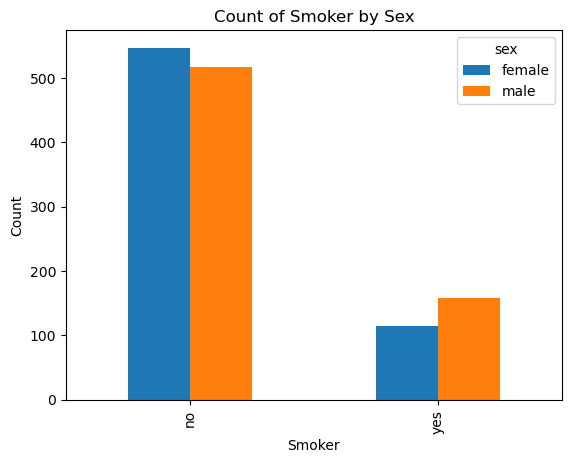

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

counts = df.groupby(['smoker', 'sex']).size().reset_index(name='count')

pivot_counts = counts.pivot(index='smoker', columns='sex', values='count')

pivot_counts.plot(kind='bar', stacked=False)

plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Count of Smoker by Sex')

plt.show()


In [26]:
needed_cols = ['sex','smoker']
df[needed_cols]

,sex,smoker
0,female,yes
1,male,no
2,male,no
3,male,no
4,male,no
...,...,...
1333,male,no
1334,female,no
1335,female,no
1336,female,no


In [27]:
groups ={}

for smoker in df['smoker'].unique():
    temp = df.loc[df['smoker']== smoker,'sex']
    groups[smoker]=temp
    
groups.keys()

dict_keys(['yes', 'no'])

In [28]:
groups['no']

1         male
2         male
3         male
4         male
5       female
         ...  
1332    female
1333      male
1334    female
1335    female
1336    female
Name: sex, Length: 1064, dtype: object

In [29]:
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [31]:
from scipy.stats import chi2_contingency


result = chi2_contingency(table)

# Unpack the results
chi2, p, deg_free, expected_vals = result

# Print or use the results
print("Chi-squared statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", deg_free)
print("Expected values table:")
print(expected_vals)


Chi-squared statistic: 7.39291081459996
P-value: 0.006548143503580696
Degrees of freedom: 1
Expected values table:
[[526.43348281 135.56651719]
 [537.56651719 138.43348281]]


P value is less than 0.05. We reject the null Hypothesis and support/accept the Alternative Hypothesis.


# Do different regions have different charges, on average?

1. State the Hypothesis & Null Hypothesis
 
 (Null Hypothesis): Regions don't have different charges on average
 
 (Alternative Hypothesis): There is a significant diffence in charges, on average in the different regions.

2.
Numerical Data

More than two groups/samples

We want to run an ANOVA test.

In [56]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

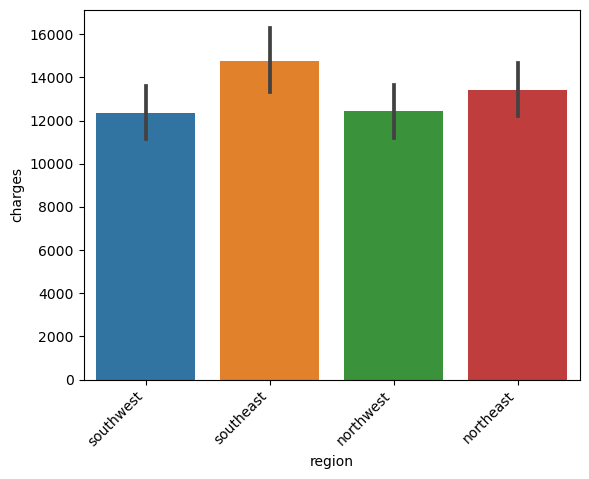

In [35]:
ax = sns.barplot(data=df, x='region', y='charges')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [58]:
needed_cols = ['region','charges']
df[needed_cols]

,region,charges
0,southwest,16884.92400
1,southeast,1725.55230
2,southeast,4449.46200
3,northwest,21984.47061
4,northwest,3866.85520
...,...,...
1333,northwest,10600.54830
1334,northeast,2205.98080
1335,southeast,1629.83350
1336,southwest,2007.94500


In [37]:
## Create a dictionary with each group as key and funded_amount as values
groups ={}

for region in df['region'].unique():
    temp = df.loc[df['region']== region, 'charges']
    groups[region] = temp

groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

3. Testing Assumptions

No significant outliers

Normality

Equal Variance



##### Checking Assumption of No Sig. Outliers

In [39]:
## Loop through groups dict
for region, data in groups.items():

    ## determine if there are any outliers
    outliers = np.abs(stats.zscore(data)) > 3
    
    ## print a statement about how many outliers for which group name
    print(f"There were {outliers.sum()} outliers in the {region} group.")

    ## Remove the outiers from data and overwrite the sector data in the dict
    data = data.loc[~outliers]
    groups[region] = data

There were 8 outliers in the southwest group.
There were 2 outliers in the southeast group.
There were 7 outliers in the northwest group.
There were 4 outliers in the northeast group.


Test for Normality

In [41]:
## Running normal test on each group and confirming there are >20 in each group

## Save a list with an inner list of column names
norm_results = [['group','n','pval','sig?']]


## loop through group dict
for sector, data in groups.items():
    ## calculate normaltest results
    stat, p = stats.normaltest(data)
    
    ## Append the right info into norm_resutls (as a list)
    norm_results.append([region,len(data), p, p<.05])
    
    
## Make norm_results a dataframe (first row is columns, everything else data)
normal_results = pd.DataFrame(norm_results[1:], columns = norm_results[0])
normal_results

,group,n,pval,sig?
0,northeast,317,7.728611e-22,True
1,northeast,362,1.936990e-13,True
2,northeast,318,2.940543e-19,True
3,northeast,320,3.557877e-17,True


Test for Equal Variances

In [43]:
## Use Levene's test for equal variance
result = stats.levene(*groups.values())
print(result)

LeveneResult(statistic=9.518349004554441, pvalue=3.2035503711783993e-06)


In [44]:
## Use an if-else to help interpret the p-value
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


Final Hypothesis Test

In [45]:
## Running Krukal Test for Original Hypothesis
result = stats.kruskal(*groups.values())
print(result)
result.pvalue<.05

KruskalResult(statistic=6.914045702545643, pvalue=0.07468847911322242)


False

Post-Hoc Multiple Comparison Test


In [46]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Testing Converting our Dictionary to a DataFrame

In [47]:
pd.DataFrame({'Charges':temp, 'region':'southwest'})

,Charges,region
8,6406.41070,southwest
10,2721.32080,southwest
16,10797.33620,southwest
17,2395.17155,southwest
20,13228.84695,southwest
...,...,...
1321,28101.33305,southwest
1325,13143.33665,southwest
1326,7050.02130,southwest
1328,22395.74424,southwest


Preparing the new dataframe for Tukey's test in a loop

In [62]:
## make a list for saving the dataframes to
tukeys_dfs = []

## Loop through groups dict's items
for region, temp in groups.items():
    
    ## make a temp_df with the data and the sector name
    temp_df = pd.DataFrame({'Charges':temp, 'region':region})
    
    ## append to tukeys_dfs
    tukeys_dfs.append(temp_df)
    
## concatenate them into 1 dataframe    
tukeys_data = pd.concat(tukeys_dfs)
tukeys_data

,Charges,region
0,16884.92400,southwest
12,1826.84300,southwest
15,1837.23700,southwest
18,10602.38500,southwest
19,36837.46700,southwest
...,...,...
1321,28101.33305,northeast
1325,13143.33665,northeast
1326,7050.02130,northeast
1328,22395.74424,northeast


In [63]:
values = tukeys_data['Charges']
labels = tukeys_data['region']

tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-1340.917,0.4263,-3611.7411,929.9072,False
northeast,southeast,1529.834,0.2794,-670.6825,3730.3505,False
northeast,southwest,-1511.915,0.3181,-3784.5349,760.705,False
northwest,southeast,2870.7509,0.0046,666.5645,5074.9374,True
northwest,southwest,-170.998,0.9974,-2447.1716,2105.1756,False
southeast,southwest,-3041.7489,0.0023,-5247.7854,-835.7125,True


In [68]:
## optional -slicing out dataframe from results
summary = tukeys_results.summary()
tukeys_df = pd.DataFrame(summary.data[1:], columns=summary.data[0])
tukeys_df

,group1,group2,meandiff,p-adj,lower,upper,reject
0,northeast,northwest,-1340.9170,0.4263,-3611.7411,929.9072,False
1,northeast,southeast,1529.8340,0.2794,-670.6825,3730.3505,False
2,northeast,southwest,-1511.9150,0.3181,-3784.5349,760.7050,False
3,northwest,southeast,2870.7509,0.0046,666.5645,5074.9374,True
4,northwest,southwest,-170.9980,0.9974,-2447.1716,2105.1756,False
5,southeast,southwest,-3041.7489,0.0023,-5247.7854,-835.7125,True


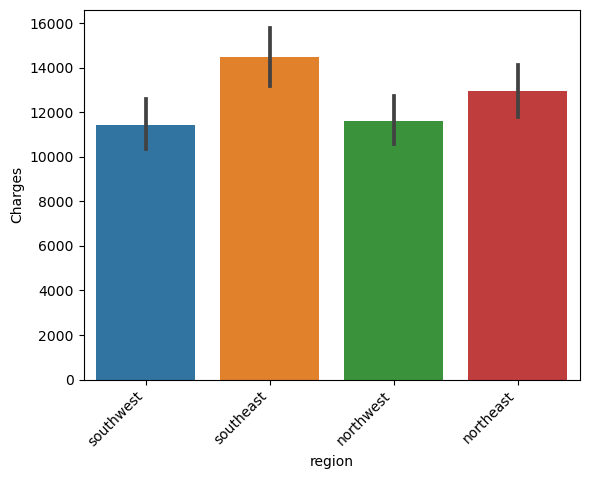

In [66]:
## make a barplot of final data to go with results
ax = sns.barplot(data=tukeys_data, x='region', y='Charges')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [69]:
tukeys_df[tukeys_df['reject'] == False]

,group1,group2,meandiff,p-adj,lower,upper,reject
0,northeast,northwest,-1340.917,0.4263,-3611.7411,929.9072,False
1,northeast,southeast,1529.834,0.2794,-670.6825,3730.3505,False
2,northeast,southwest,-1511.915,0.3181,-3784.5349,760.7050,False
4,northwest,southwest,-170.998,0.9974,-2447.1716,2105.1756,False


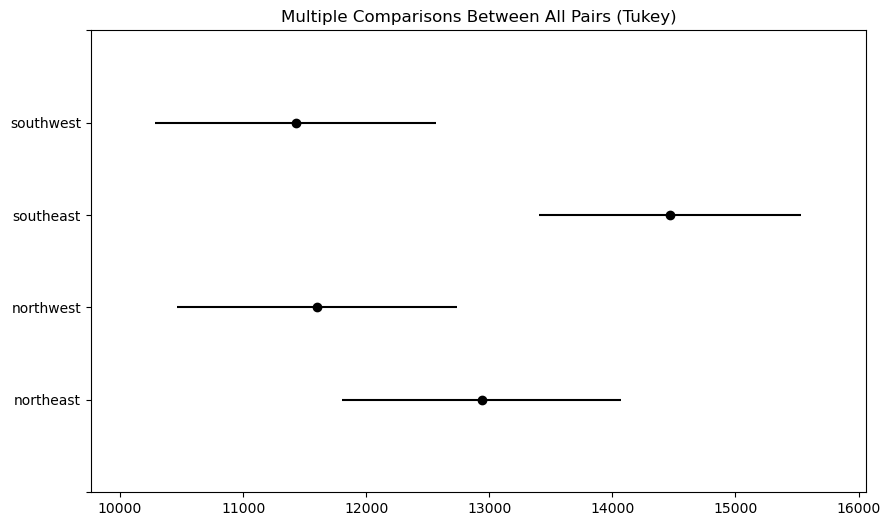

In [70]:
tukeys_results.plot_simultaneous();

P-value is greater than 0.05. We reject the null hypothesis and support that there is significant diffence in charges, on average in the different regions.